1. 0(low cost)
2. 1(medium cost)
3. 2(high cost)
4. 3(very high cost)

In [1]:
#load required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
ls

mobile_price.ipynb  mobile_prices.csv


In [5]:
#load data
data=pd.read_csv("mobile_prices.csv")
df=data.copy()
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.shape

(2000, 21)

In this dataset, there are 2000 rows and 21 columns, and no missing value found. Also,no categorical data are found in this dataset. 

<AxesSubplot:>

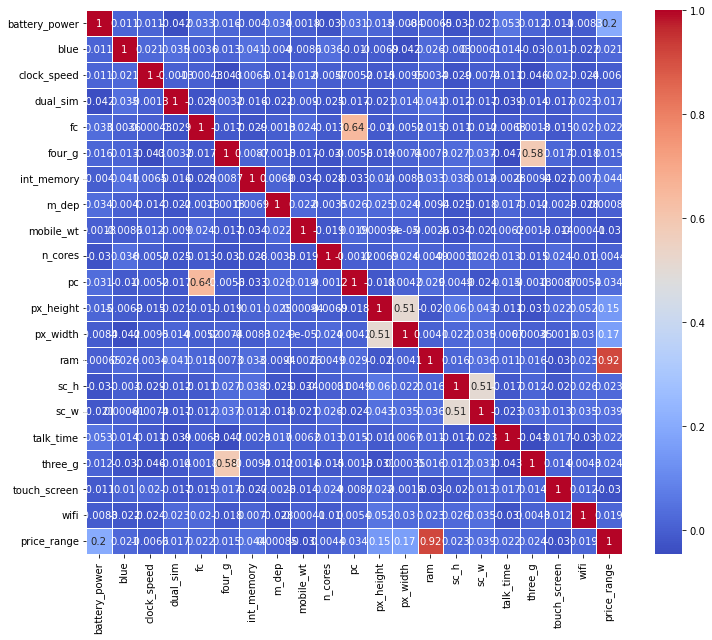

In [11]:
#create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linecolor="white",linewidths=1)

# Data Preparation

Transformation is not required in this dataset because all the features are numerical. To train up model, Standardization or Normalization is essential. now, in the next step is going to split the dataset as 80% and 20% to get the better accuracy results.


In [18]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

# Logistic Regression Model

In [25]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
accuracy=accuracy_score(ytest,ypred)*100
print("Accuracy of LogisticRegression model:", accuracy)

Accuracy of LogisticRegression model: 64.5


The model accuracy is not better.

In [29]:
print(ypred)

[3 0 2 1 3 0 0 2 2 2 1 3 1 1 2 0 3 2 2 1 0 0 3 1 1 2 3 1 3 1 2 0 1 1 1 3 0
 0 3 2 3 3 3 3 2 2 0 1 3 1 0 2 0 3 0 3 3 1 0 3 3 2 2 1 1 3 3 3 2 2 3 2 1 0
 1 3 3 1 1 1 3 1 3 0 0 0 1 0 1 3 2 2 1 0 0 3 2 3 0 2 1 2 2 0 3 2 3 2 3 3 2
 0 0 2 3 3 1 0 1 0 0 3 2 2 1 2 0 0 0 3 1 3 3 2 3 3 3 3 0 1 1 3 2 3 1 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 1 2 2 1 3 3 3 3 0 1 3 2 1 3 3 0 1 1 3 0 3 1 0 1 2
 1 3 0 3 3 3 3 0 1 2 1 0 2 2 0 3 3 3 0 1 3 2 2 0 0 0 2 2 2 0 0 0 2 2 2 2 3
 0 0 3 3 2 3 0 3 1 0 0 3 2 0 2 2 0 0 0 3 3 2 0 0 2 3 3 1 3 0 2 1 1 0 1 2 3
 2 1 0 1 3 3 3 2 3 3 2 1 2 2 2 1 3 2 2 2 1 0 2 1 0 0 0 1 3 3 3 0 1 2 0 2 2
 3 0 1 0 1 1 3 0 0 1 3 1 2 0 1 1 2 0 3 3 2 2 0 1 3 1 0 1 0 1 0 3 1 2 2 0 0
 2 3 0 3 1 1 0 1 3 0 2 1 1 2 2 2 0 2 0 0 2 1 2 3 2 2 0 3 2 3 2 2 2 2 3 3 0
 2 0 1 0 1 1 2 2 1 3 1 1 0 1 1 3 1 0 0 3 0 3 0 2 3 1 1 0 2 1]


In [32]:
(unique,counts)=np.unique(ypred,return_counts=True)
mobile_price=np.asarray((unique,counts)).T
print(mobile_price)

[[  0 100]
 [  1  94]
 [  2  97]
 [  3 109]]


In [ ]:
from sklearn.model_selection import Leave